# Data analysis

## Load data

In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from qiskit_experiments.framework import (
    ExperimentData,
    ExperimentDecoder,
    ExperimentEncoder,
)
from qiskit_research.mzm_generation import KitaevHamiltonianAnalysis

In [2]:
# use this cell to retrieve data from the Qiskit Experiments database service

# from qiskit import IBMQ
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub="ibm-q-internal", group="deployed", project="default")

# db_experiment_id = '960a6482-1a98-4509-96d3-2c46ac35b733'

# # retrieve data
# data = ExperimentData.load(db_experiment_id, provider.service("experiment"))

# # save data to local disk
# params = data.metadata["params"]
# filename = f"data/{params.filename}.json"
# os.makedirs(os.path.dirname(filename), exist_ok=True)
# with open(filename, "w") as f:
#     json.dump(data, f, cls=ExperimentEncoder)

# print(params.filename)

In [3]:
# load data from local disk

filename = "2022-06-09T012809.963762_aer_simulator_n3"

# directory with test data, edit this as appropriate
basedir = "../../test/test_data/mzm_generation"
# basedir = ""
with open(os.path.join(basedir, "data", f"{filename}.json")) as f:
    # this may raise an error from Qiskit Experiments but it should be safe to ignore
    data = json.load(f, cls=ExperimentDecoder)

/home/kevinsung/.local/share/virtualenvs/qiskit-research-nltjU0Sz/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{'timestamp': '2022-06-09T012809.963762', 'backend_name': 'aer_simulator', 'qubits': [0, 1, 2], 'n_modes': 3, 'tunneling_values': [-1.0], 'superconducting_values': [1.0], 'chemical_potential_values': [0.0, 0.75, 1.5, 2.25, 3.0], 'occupied_orbitals_list': [[], [0, 1, 2], [0], [1, 2], [1], [0, 2]], 'dynamical_decoupling_sequences': None, 'pulse_scaling': False, 'num_twirled_circuits': 0, 'seed': 11364, 'basedir': None}], kwargs={'provider': None}, experiment_options={}, transpile_options={}, run_options={'shots': 10000}, version='0.3.1') using __json_decode__ method. 
The following exception was raised:
Tra

In [4]:
%%time
# run analysis
analysis = KitaevHamiltonianAnalysis()
data = analysis.run(data, replace_results=True)
data.block_for_results()

/home/kevinsung/projects/qiskit-research/qiskit_research/mzm_generation/utils.py:109: UserWarning: The default value for `display_format` will be changed from 'dense' to 'sparse' in version 0.3.0. Once that happens, you must specify display_format='dense' directly.
  return FermionicOp(f"-_{index}") + FermionicOp(f"+_{index}")


CPU times: user 580 ms, sys: 26.3 ms, total: 606 ms
Wall time: 608 ms


<ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: 62043feb-f813-4893-96e8-2e2263e0d9ea>

In [5]:
params = data.metadata["params"]

# load results
fidelity_witness_avg = data.analysis_results("fidelity_witness_avg").value
energy_exact = data.analysis_results("energy_exact").value
energy = data.analysis_results("energy").value
energy_error = data.analysis_results("energy_error").value
bdg_energy_exact = data.analysis_results("bdg_energy_exact").value
bdg_energy = data.analysis_results("bdg_energy").value
edge_correlation_exact = data.analysis_results("edge_correlation_exact").value
edge_correlation = data.analysis_results("edge_correlation").value
number_exact = data.analysis_results("number_exact").value
number = data.analysis_results("number").value
parity_exact = data.analysis_results("parity_exact").value
parity = data.analysis_results("parity").value
site_correlation_exact = data.analysis_results("site_correlation_exact").value
site_correlation = data.analysis_results("site_correlation").value

# create plot directory
PLOT_DIR = f"plots/{params.filename}"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

print(params)

KitaevHamiltonianExperimentParameters(timestamp='2022-06-09T012809.963762', backend_name='aer_simulator', qubits=[0, 1, 2], n_modes=3, tunneling_values=[-1.0], superconducting_values=[1.0], chemical_potential_values=[0.0, 0.75, 1.5, 2.25, 3.0], occupied_orbitals_list=[(), (0, 1, 2), (0,), (1, 2), (1,), (0, 2)], dynamical_decoupling_sequences=None, pulse_scaling=False, num_twirled_circuits=0, seed=11364, basedir=None)


## Make plots

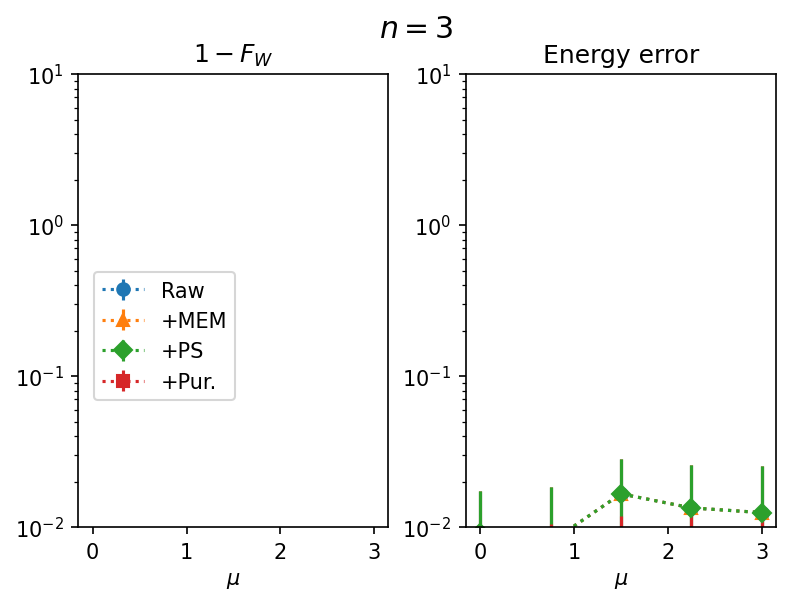

In [6]:
# plot fidelity witness and average energy error
dd_sequence = None
# dd_sequence = "XY4pm"

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=dpi)
fig.subplots_adjust(wspace=0.25)

values, stddev = fidelity_witness_avg[dd_sequence]["raw"]
ax1.errorbar(
    params.chemical_potential_values,
    1 - values,
    yerr=2 * stddev,
    fmt="o:",
    label="Raw",
)
values, stddev = fidelity_witness_avg[dd_sequence]["mem"]
ax1.errorbar(
    params.chemical_potential_values,
    1 - values,
    yerr=2 * stddev,
    fmt="^:",
    label="+MEM",
)
values, stddev = fidelity_witness_avg[dd_sequence]["ps"]
ax1.errorbar(
    params.chemical_potential_values,
    1 - values,
    yerr=2 * stddev,
    fmt="D:",
    label="+PS",
)
values, stddev = fidelity_witness_avg[dd_sequence]["pur"]
ax1.errorbar(
    params.chemical_potential_values,
    1 - values,
    yerr=2 * stddev,
    fmt="s:",
    label="+Pur.",
)
ax1.set_xlabel(r"$\mu$")
ax1.set_title(r"$1 - F_W$")
ax1.set_yscale("log")
ax1.set_ylim(1e-2, 10)

values, stddev = energy_error[dd_sequence]["raw"]
ax2.errorbar(
    params.chemical_potential_values,
    values,
    yerr=2 * stddev,
    fmt="o:",
    label="Raw",
)
values, stddev = energy_error[dd_sequence]["mem"]
ax2.errorbar(
    params.chemical_potential_values,
    values,
    yerr=2 * stddev,
    fmt="^:",
    label="+MEM",
)
values, stddev = energy_error[dd_sequence]["ps"]
ax2.errorbar(
    params.chemical_potential_values,
    values,
    yerr=2 * stddev,
    fmt="D:",
    label="+PS",
)
values, stddev = energy_error[dd_sequence]["pur"]
ax2.errorbar(
    params.chemical_potential_values,
    values,
    yerr=2 * stddev,
    fmt="s:",
    label="+Pur.",
)
ax2.set_xlabel(r"$\mu$")
ax2.set_title(r"Energy error")
ax2.set_yscale("log")
ax2.set_ylim(1e-2, 10)
# ax1.legend(loc=(0.05, 0.33))
ax1.legend(loc=(0.05, 0.28))
# ax1.legend(loc="center left")
fig.suptitle(
    rf"$n = {params.n_modes}$",
    size="x-large",
    # y=0.02
)

data.add_figures(fig, "fidelity_witness", overwrite=True)
plt.savefig(
    f"{PLOT_DIR}/fidelity_witness_dd-{dd_sequence}_n{params.n_modes}.{filetype}"
)
plt.show()

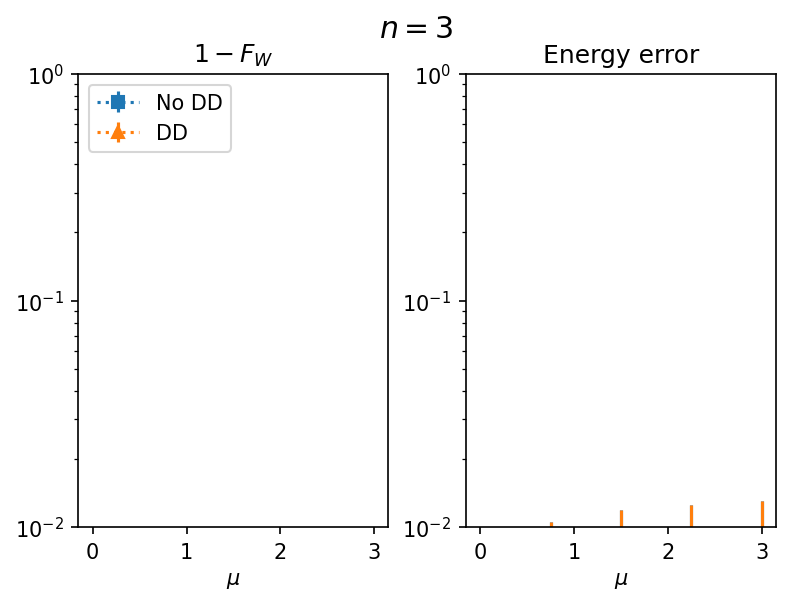

In [7]:
# plot fidelity witness and average energy error, dd vs no dd

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=dpi)
fig.subplots_adjust(wspace=0.25)

values, stddev = fidelity_witness_avg[None]["pur"]
ax1.errorbar(
    params.chemical_potential_values,
    1 - values,
    yerr=2 * stddev,
    fmt="s:",
    label="No DD",
)
values, stddev = fidelity_witness_avg[dd_sequence]["pur"]
ax1.errorbar(
    params.chemical_potential_values,
    1 - values,
    yerr=2 * stddev,
    fmt="^:",
    label="DD",
)
ax1.set_xlabel(r"$\mu$")
ax1.set_title(r"$1 - F_W$")
ax1.set_yscale("log")
ax1.set_ylim(1e-2, 1)

values, stddev = energy_error[None]["pur"]
ax2.errorbar(
    params.chemical_potential_values,
    values,
    yerr=2 * stddev,
    fmt="s:",
    label="No DD",
)
values, stddev = energy_error[dd_sequence]["pur"]
ax2.errorbar(
    params.chemical_potential_values,
    values,
    yerr=2 * stddev,
    fmt="^:",
    label="DD",
)
ax2.set_xlabel(r"$\mu$")
ax2.set_title(r"Energy error")
ax2.set_yscale("log")
ax2.set_ylim(1e-2, 1)
ax1.legend(loc="upper left")
fig.suptitle(
    rf"$n = {params.n_modes}$",
    size="x-large",
    # y=0.02
)

data.add_figures(fig, "fidelity_witness_dd", overwrite=True)
plt.savefig(f"{PLOT_DIR}/fidelity_witness_dd_compare_n{params.n_modes}.{filetype}")
plt.show()

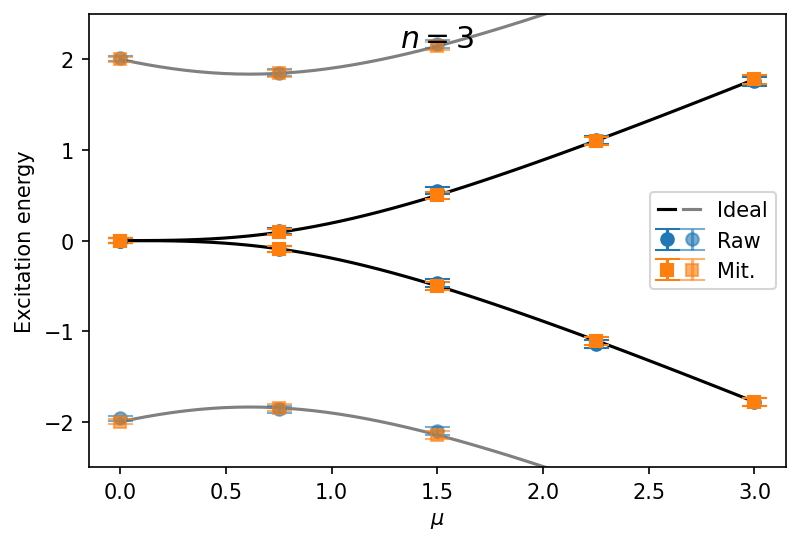

In [8]:
# plot BdG energies
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

ideal_lines = []
for i, energies in enumerate(bdg_energy_exact[0]):
    color = "gray" if i % 2 else "black"
    ideal_lines.append(
        ax.plot(
            bdg_energy_exact[1], energies, color=color, label=None if i else "Ideal"
        )
    )

threshold = len(bdg_energy[dd_sequence]["raw"][0]) // 2
raw_values, raw_stddev = bdg_energy[dd_sequence]["raw"]
mit_values, mit_stddev = bdg_energy[dd_sequence]["pur"]

raw_lines = []
mit_lines = []
for i in range(threshold):
    alpha = 1.0 if i == 0 else 0.6
    raw1 = ax.errorbar(
        params.chemical_potential_values,
        raw_values[i],
        yerr=2 * raw_stddev[i],
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=alpha,
        label=None if i else "Raw",
    )
    raw2 = ax.errorbar(
        params.chemical_potential_values,
        raw_values[threshold + i],
        yerr=2 * raw_stddev[threshold + i],
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=alpha,
    )
    mit1 = ax.errorbar(
        params.chemical_potential_values,
        mit_values[i],
        yerr=2 * mit_stddev[i],
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=alpha,
        label=None if i else "Mit.",
    )
    mit2 = ax.errorbar(
        params.chemical_potential_values,
        mit_values[threshold + i],
        yerr=2 * mit_stddev[threshold + i],
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=alpha,
    )
    raw_lines.append(raw1)
    raw_lines.append(raw2)
    mit_lines.append(mit1)
    mit_lines.append(mit2)
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"Excitation energy")
ax.set_ylim(-2.5, 2.5)

from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

(p1,) = ideal_lines[0]
(p2,) = ideal_lines[1]
q1 = raw_lines[0]
q2 = raw_lines[2]
r1 = mit_lines[0]
r2 = mit_lines[2]
ax.legend(
    [(p1, p2), (q1, q2), (r1, r2)],
    ["Ideal", "Raw", "Mit."],
    numpoints=1,
    handler_map={tuple: HandlerTuple(ndivide=None)},
)
# ax.legend(loc="center right")

ax.set_title(rf"$n = {params.n_modes}$", size="x-large", y=0.90)

data.add_figures(fig, "bdg_energy", overwrite=True)
plt.savefig(f"{PLOT_DIR}/bdg_energy_dd-{dd_sequence}_n{params.n_modes}.{filetype}")

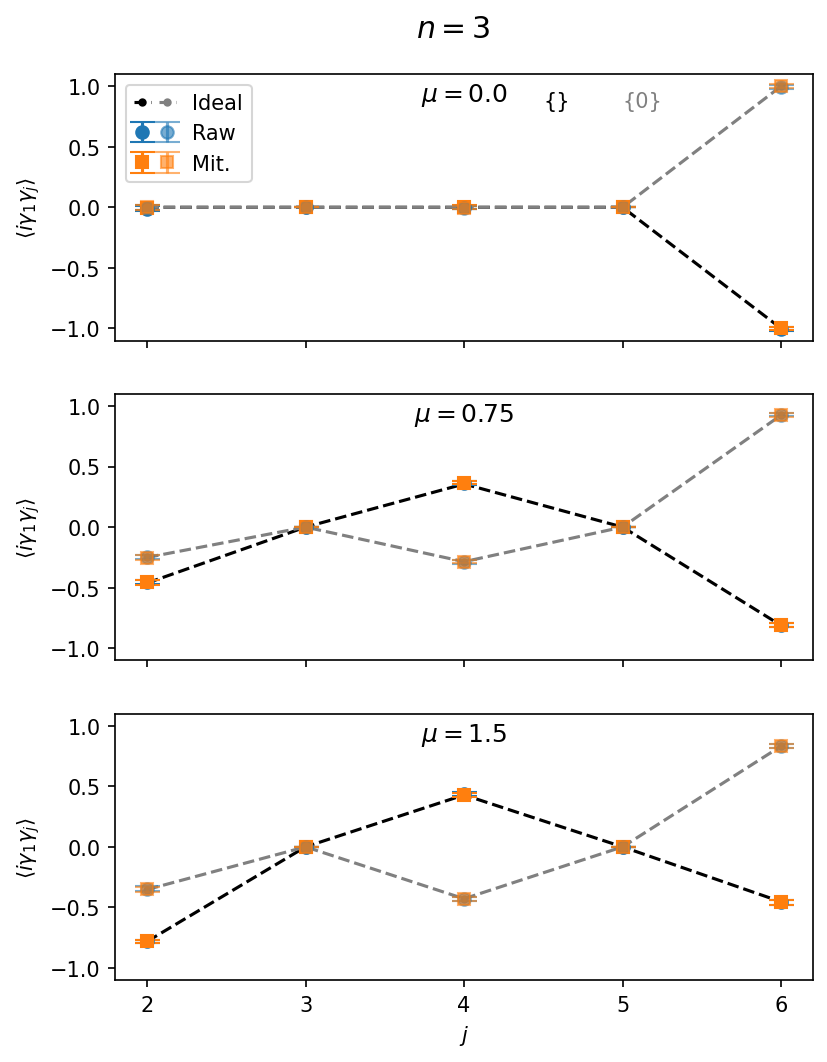

In [9]:
### plot site correlation
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

xvals = range(2, 2 * params.n_modes + 1)

chemical_potentials_to_plot = params.chemical_potential_values[:3]
# chemical_potentials_to_plot = params.chemical_potential_values
occupied_orbitals_to_plot = params.occupied_orbitals_list[0:3:2]
# occupied_orbitals_to_plot = params.occupied_orbitals_list[2:4]

fig, axes = plt.subplots(len(chemical_potentials_to_plot), 1, dpi=dpi, figsize=(6, 8))
# fig.subplots_adjust(hspace=0.7)

ideal_lines = []
raw_lines = []
mit_lines = []
for index, (ax, chemical_potential) in enumerate(
    zip(axes, chemical_potentials_to_plot)
):
    for i, occupied_orbitals in enumerate(occupied_orbitals_to_plot):
        alpha = 1.0 if i == 0 else 0.6
        # this_parity = int(parity_exact[occupied_orbitals][0][index])
        ideal_color = "black" if i == 0 else "gray"
        ideal_text = str(list(occupied_orbitals)).replace("[", "{").replace("]", "}")
        if index == 0:
            ax.text(4.5 + i * 0.5, 0.83, ideal_text, color=ideal_color)
        site_correlations = site_correlation_exact[
            chemical_potential, occupied_orbitals
        ]
        ideal_lines.append(
            ax.plot(
                xvals,
                site_correlations,
                ".--",
                color=ideal_color,
                label="Ideal" if not occupied_orbitals else None,
            )
        )
        (vals, stddevs) = site_correlation[dd_sequence]["raw"][
            chemical_potential, occupied_orbitals
        ]
        raw_lines.append(
            ax.errorbar(
                xvals,
                vals,
                yerr=2 * np.array(stddevs),
                fmt="o",
                capsize=capsize,
                color=colors[0],
                alpha=alpha,
                label=None if i else "Raw",
            )
        )
        (vals, stddevs) = site_correlation[dd_sequence]["pur"][
            chemical_potential, occupied_orbitals
        ]
        mit_lines.append(
            ax.errorbar(
                xvals,
                vals,
                yerr=2 * np.array(stddevs),
                fmt="s",
                capsize=capsize,
                color=colors[1],
                alpha=alpha,
                label=None if i else "Mit.",
            )
        )
        ax.set_ylim(-1.1, 1.1)
    ax.set_ylabel(r"$\langle i \gamma_1 \gamma_j \rangle$")
    ax.set_xticks(xvals)
    if index == 0:
        from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

        (p1,) = ideal_lines[0]
        (p2,) = ideal_lines[1]
        q1 = raw_lines[0]
        q2 = raw_lines[1]
        r1 = mit_lines[0]
        r2 = mit_lines[1]
        ax.legend(
            [(p1, p2), (q1, q2), (r1, r2)],
            ["Ideal", "Raw", "Mit."],
            numpoints=1,
            handler_map={tuple: HandlerTuple(ndivide=None)},
            loc="upper left",
        )
        # ax.legend(loc='lower left')
    if index == len(axes) - 1:
        ax.set_xlabel(r"$j$")
    else:
        ax.tick_params(axis="x", labelbottom=False)

    ax.set_title(rf"$\mu={chemical_potential}$", y=0.85)

fig.suptitle(rf"$n = {params.n_modes}$", size="x-large", y=0.93)
data.add_figures(fig, f"site_correlation", overwrite=True)
plt.savefig(
    f"{PLOT_DIR}/site_correlation_dd-{dd_sequence}_n{params.n_modes}.{filetype}"
)
plt.show()

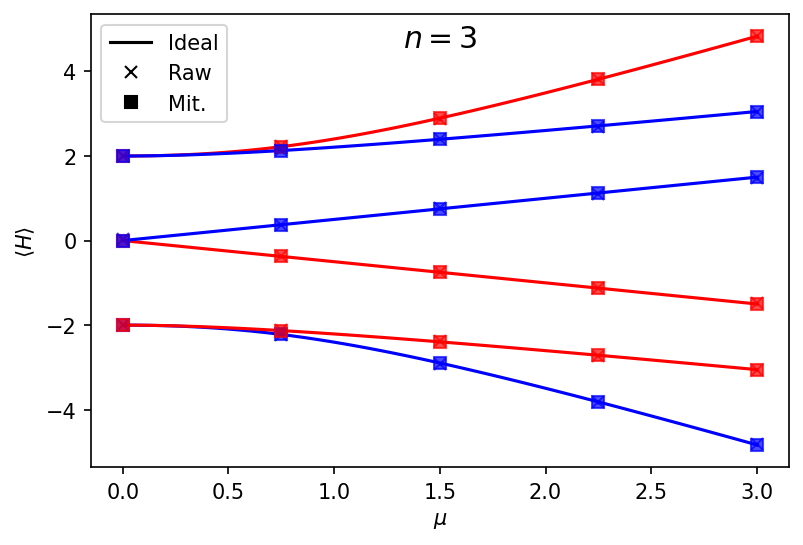

In [10]:
# plot energy
fig, ax = plt.subplots(dpi=dpi)

for occupied_orbitals, (energies, xvals) in energy_exact.items():
    ax.plot(
        xvals,
        energies,
        # label = "Ideal" if not i else None,
        color="red" if len(occupied_orbitals) % 2 else "blue",
    )
for occupied_orbitals, (energies, stddevs) in energy[dd_sequence]["raw"].items():
    ax.errorbar(
        params.chemical_potential_values,
        energies,
        yerr=2 * np.array(stddevs),
        fmt="x",
        # label="Raw" if not i else None,
        color="red" if len(occupied_orbitals) % 2 else "blue",
        alpha=0.7,
    )
for occupied_orbitals, (energies, stddevs) in energy[dd_sequence]["pur"].items():
    ax.errorbar(
        params.chemical_potential_values,
        energies,
        yerr=2 * np.array(stddevs),
        fmt="s",
        # label = "Mit." if not i else None,
        color="red" if len(occupied_orbitals) % 2 else "blue",
        alpha=0.7,
    )
ax.plot([], [], label="Ideal", color="black")
ax.errorbar([], [], fmt="x", label="Raw", color="black")
ax.errorbar([], [], fmt="s", label="Mit.", color="black")
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle H \rangle$")
ax.set_title(rf"$n = {params.n_modes}$", size="x-large", y=0.90)
ax.legend()

data.add_figures(fig, "energy", overwrite=True)
plt.savefig(f"{PLOT_DIR}/energy_dd-{dd_sequence}_n{params.n_modes}.{filetype}")
plt.show()

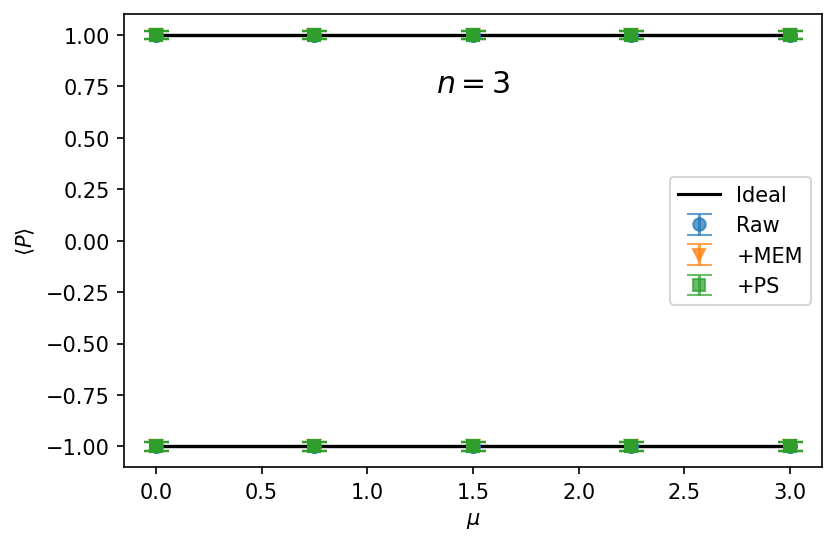

In [11]:
# plot parity
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

for occupied_orbitals, (parities, xvals) in parity_exact.items():
    ax.plot(
        xvals, parities, label="Ideal" if not occupied_orbitals else None, color="black"
    )

for occupied_orbitals, (parities, stddevs) in parity[dd_sequence]["raw"].items():
    label = "Raw" if not occupied_orbitals else None
    color = "red" if len(occupied_orbitals) % 2 else "blue"
    ax.errorbar(
        params.chemical_potential_values,
        parities,
        yerr=2 * np.array(stddevs),
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=0.7,
        label="Raw" if not occupied_orbitals else None,
    )
for occupied_orbitals, (parities, stddevs) in parity[dd_sequence]["mem"].items():
    ax.errorbar(
        params.chemical_potential_values,
        parities,
        yerr=2 * np.array(stddevs),
        fmt="v",
        capsize=capsize,
        color=colors[1],
        alpha=0.7,
        label="+MEM" if not occupied_orbitals else None,
    )
for occupied_orbitals, (parities, stddevs) in parity[dd_sequence]["ps"].items():
    ax.errorbar(
        params.chemical_potential_values,
        parities,
        yerr=2 * np.array(stddevs),
        fmt="s",
        capsize=capsize,
        color=colors[2],
        alpha=0.7,
        label="+PS" if not occupied_orbitals else None,
    )
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle P \rangle$")
ax.set_ylim(-1.1, 1.1)
ax.legend()
ax.set_title(rf"$n = {params.n_modes}$", size="x-large", y=0.80)

data.add_figures(fig, "parity", overwrite=True)
plt.savefig(f"{PLOT_DIR}/parity_dd-{dd_sequence}_n{params.n_modes}.{filetype}")
plt.show()

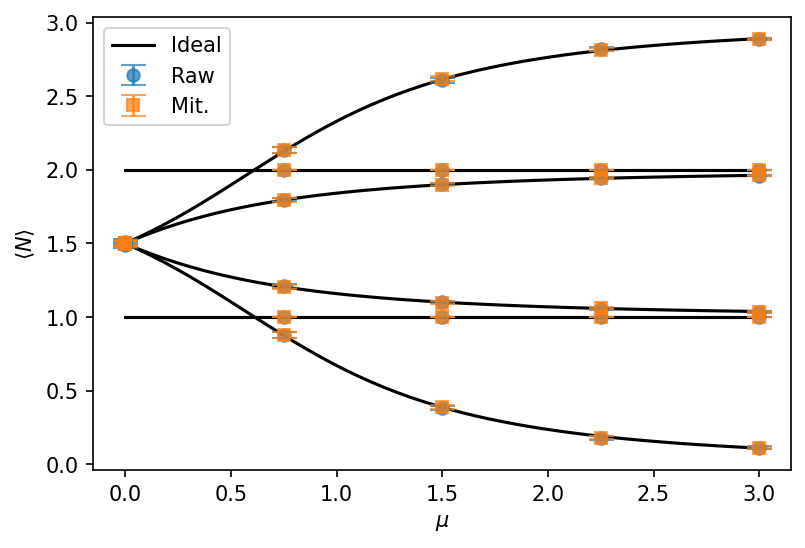

In [12]:
# plot number
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

for occupied_orbitals, (numbers, xvals) in number_exact.items():
    ax.plot(
        xvals,
        numbers,
        label="Ideal" if not occupied_orbitals else None,
        color="black",
    )

for occupied_orbitals, (numbers, stddevs) in number[dd_sequence]["raw"].items():
    ax.errorbar(
        params.chemical_potential_values,
        numbers,
        yerr=2 * np.array(stddevs),
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=0.7,
        label="Raw" if not occupied_orbitals else None,
    )
for occupied_orbitals, (numbers, stddevs) in number[dd_sequence]["pur"].items():
    ax.errorbar(
        params.chemical_potential_values,
        numbers,
        yerr=2 * np.array(stddevs),
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=0.7,
        label="Mit." if not occupied_orbitals else None,
    )
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle N \rangle$")
ax.legend()

data.add_figures(fig, "number", overwrite=True)
plt.savefig(f"{PLOT_DIR}/number_dd-{dd_sequence}_n{params.n_modes}.{filetype}")
plt.show()

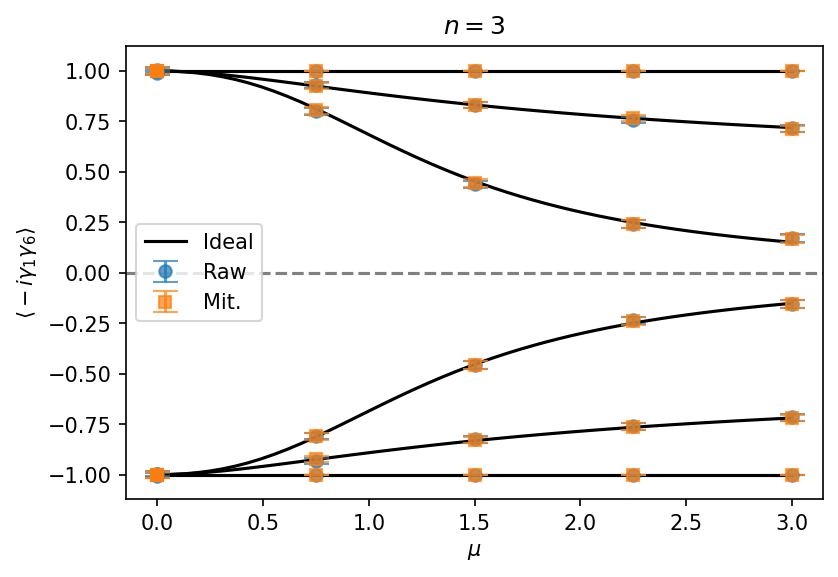

In [13]:
# plot edge correlation
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

for occupied_orbitals, (values, xvals) in edge_correlation_exact.items():
    ax.plot(
        xvals,
        values,
        color="black",
        label="Ideal" if not occupied_orbitals else None,
    )

for occupied_orbitals, (values, stddevs) in edge_correlation[dd_sequence][
    "raw"
].items():
    ax.errorbar(
        params.chemical_potential_values,
        values,
        yerr=2 * np.array(stddevs),
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=0.7,
        label="Raw" if not occupied_orbitals else None,
    )
for occupied_orbitals, (values, stddevs) in edge_correlation[dd_sequence][
    "pur"
].items():
    ax.errorbar(
        params.chemical_potential_values,
        values,
        yerr=2 * np.array(stddevs),
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=0.7,
        label="Mit." if not occupied_orbitals else None,
    )
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle -i \gamma_1 \gamma_6 \rangle$")
ax.axhline([0], color="gray", linestyle="--")
ax.legend(loc="center left")
ax.set_title(rf"$n = {params.n_modes}$")

data.add_figures(fig, "edge_correlation", overwrite=True)
plt.savefig(
    f"{PLOT_DIR}/edge_correlation_dd-{dd_sequence}_n{params.n_modes}.{filetype}"
)
plt.show()